In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from fim import apriori

import statistics
import math

In [2]:
df = pd.read_csv("words_glasgow.csv", skipinitialspace=True)

## Pre-processing (light)

In [3]:
intp = df['web_corpus_freq'].interpolate(method="linear")
df['web_corpus_freq_interp_linear'] = df['web_corpus_freq'].fillna(intp)

#remove useless variables
column2drop = ["word", 'web_corpus_freq', 'semsize', 'imageability']
df.drop(column2drop, axis=1, inplace=True)

# Pattern Mining pre-processing

In [4]:
mean_0=df['arousal'].mean()
mean_1=df['valence'].mean()
mean_2=df['dominance'].mean()
mean_3=df['concreteness'].mean()
mean_4=df['familiarity'].mean()
mean_5=df['aoa'].mean()
mean_6=df['gender'].mean()
mean_7=df['web_corpus_freq_interp_linear'].mean()

max_0=df['arousal'].max()
max_1=df['valence'].max()
max_2=df['dominance'].max()
max_3=df['concreteness'].max()
max_4=df['familiarity'].max()
max_5=df['aoa'].max()
max_6=df['gender'].max()
max_7=df['web_corpus_freq_interp_linear'].max()

mm=(mean_7+max_7)/2
om=mean_7/2

bins=[0, mean_0, max_0]
labels=['arousal_low','arousal_high']
df['arousal_group'] = pd.cut(df['arousal'], bins, labels=labels)

bins=[0, mean_1, max_1]
labels=['valence_low','valence_high']
df['valence_group'] = pd.cut(df['valence'], bins, labels=labels)

bins=[0, mean_2, max_2]
labels=['dominance_low','dominance_high']
df['dominance_group'] = pd.cut(df['dominance'], bins, labels=labels)

bins=[0, mean_3, max_3]
labels=['concreteness_low','concreteness_high']
df['concreteness_group'] = pd.cut(df['concreteness'], bins, labels=labels)

bins=[0, mean_4, max_4]
labels=['familiarity_low','familiarity_high']
df['familiarity_group'] = pd.cut(df['familiarity'], bins, labels=labels)

bins=[0, mean_5, max_5]
labels=['aoa_low','aoa_high']
df['aoa_group'] = pd.cut(df['aoa'], bins, labels=labels)

bins=[1, 3.1, 4.87, max_6]
labels=['gender_fem','gender_unisex','gender_mal']
df['gender_group'] = pd.cut(df['gender'], bins, labels=labels)

bins=[0,om,mean_7,mm,max_7]
labels=['web_corpus_no_freq','web_corpus_low_freq','web_corpus_freq','web_corpus_high_freq']
df['web_corpus_freq_interp_group'] = pd.cut(df['web_corpus_freq_interp_linear'], bins,labels=labels)

#remove variables
column3drop = ["arousal", 'valence', 'dominance', 'concreteness', 'familiarity', 'aoa', 'gender', 'web_corpus_freq_interp_linear']
df.drop(column3drop, axis=1, inplace=True)

df

,length,polysemy,arousal_group,valence_group,dominance_group,concreteness_group,familiarity_group,aoa_group,gender_group,web_corpus_freq_interp_group
0,8,0,arousal_low,valence_low,dominance_low,concreteness_high,familiarity_low,aoa_high,gender_mal,web_corpus_no_freq
1,5,0,arousal_low,valence_high,dominance_low,concreteness_high,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq
2,10,0,arousal_low,valence_high,dominance_high,concreteness_low,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq
3,8,0,arousal_low,valence_low,dominance_low,concreteness_low,familiarity_low,aoa_high,gender_mal,web_corpus_no_freq
4,10,0,arousal_low,valence_low,dominance_low,concreteness_low,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq
...,...,...,...,...,...,...,...,...,...,...
4677,8,0,arousal_high,valence_low,dominance_high,concreteness_high,familiarity_low,aoa_high,gender_mal,web_corpus_no_freq
4678,4,0,arousal_low,valence_low,dominance_low,concreteness_low,familiarity_high,aoa_low,gender_unisex,web_corpus_freq
4679,4,0,arousal_high,valence_high,dominance_high,concreteness_low,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq
4680,3,0,arousal_high,valence_high,dominance_high,concreteness_high,familiarity_high,aoa_low,gender_unisex,web_corpus_no_freq


In [5]:
poly_dict = {0: 'Not Polysemic', 1: 'Polysemic'}
df['polysemy'] = df['polysemy'].map(poly_dict)

In [6]:
df.head()

,length,polysemy,arousal_group,valence_group,dominance_group,concreteness_group,familiarity_group,aoa_group,gender_group,web_corpus_freq_interp_group
0,8,Not Polysemic,arousal_low,valence_low,dominance_low,concreteness_high,familiarity_low,aoa_high,gender_mal,web_corpus_no_freq
1,5,Not Polysemic,arousal_low,valence_high,dominance_low,concreteness_high,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq
2,10,Not Polysemic,arousal_low,valence_high,dominance_high,concreteness_low,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq
3,8,Not Polysemic,arousal_low,valence_low,dominance_low,concreteness_low,familiarity_low,aoa_high,gender_mal,web_corpus_no_freq
4,10,Not Polysemic,arousal_low,valence_low,dominance_low,concreteness_low,familiarity_low,aoa_high,gender_unisex,web_corpus_no_freq


In [7]:
X = df.values.tolist()

In [8]:
X[4]

[10,
 'Not Polysemic',
 'arousal_low',
 'valence_low',
 'dominance_low',
 'concreteness_low',
 'familiarity_low',
 'aoa_high',
 'gender_unisex',
 'web_corpus_no_freq']

In [9]:
itemsets = apriori(X, supp=10, zmin=3, report='S')

In [10]:
len(itemsets)

983

In [11]:
#frequent itemset
itemsets[0][0]

('gender_fem', 'valence_high', 'Not Polysemic')

In [12]:
#support
itemsets[0][1]

10.465612985903459

In [13]:
itemsets = apriori(X, target='m', supp=2, zmin=3, report='S')

In [14]:
n_f_its = []
F = np.arange(1, 96, 1)
for i in F:
    n_f_its.append(len(apriori(X, supp=i, zmin=3, report='S')))

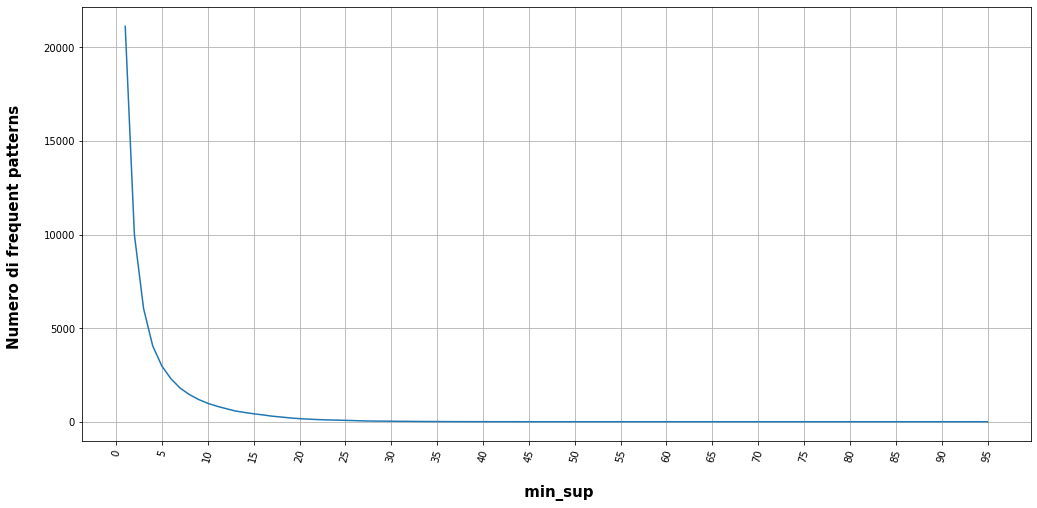

In [15]:
plt.figure(figsize=(17,8))
values = np.arange(0, 100, 5)
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(1, len(n_f_its)+1), n_f_its, markersize=10, markerfacecolor='black')
plt.ylabel('Numero di frequent patterns \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n min_sup', fontsize = 15, fontweight = 'bold')
plt.xticks(values, rotation = '075')
plt.grid(True)
plt.show()

In [16]:
n_f_itconf = []
F = np.arange(1, 96, 1)
for i in F:
    n_f_itconf.append(len(apriori(X, target='r', supp=2, zmin=3, conf=i, report='c')))

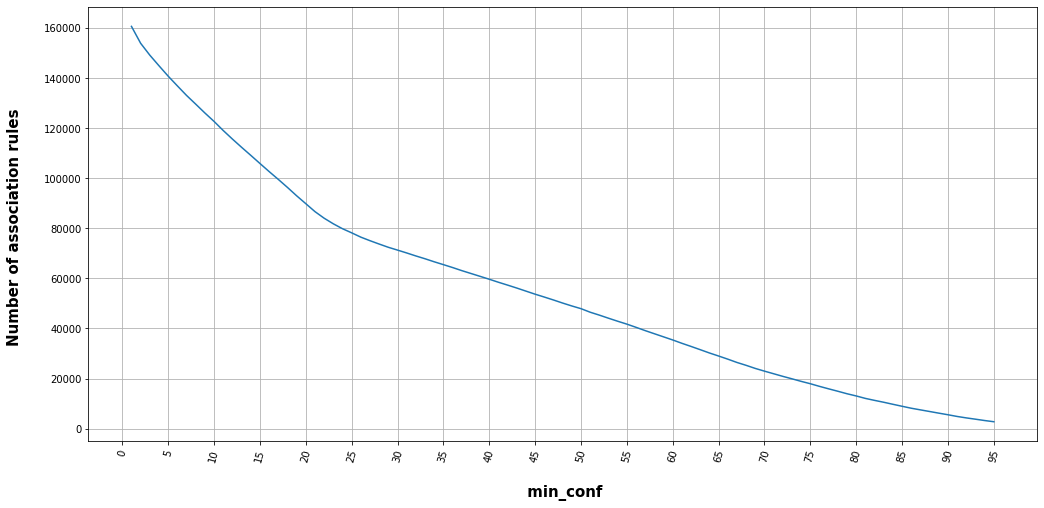

In [17]:
plt.figure(figsize=(17,8))
values = np.arange(0, 100, 5)
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(1, len(n_f_itconf)+1), n_f_itconf, markersize=10, markerfacecolor='black')
plt.ylabel('Number of association rules \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n min_conf', fontsize = 15, fontweight = 'bold')
plt.xticks(values, rotation = '075')
plt.grid(True)
plt.show()

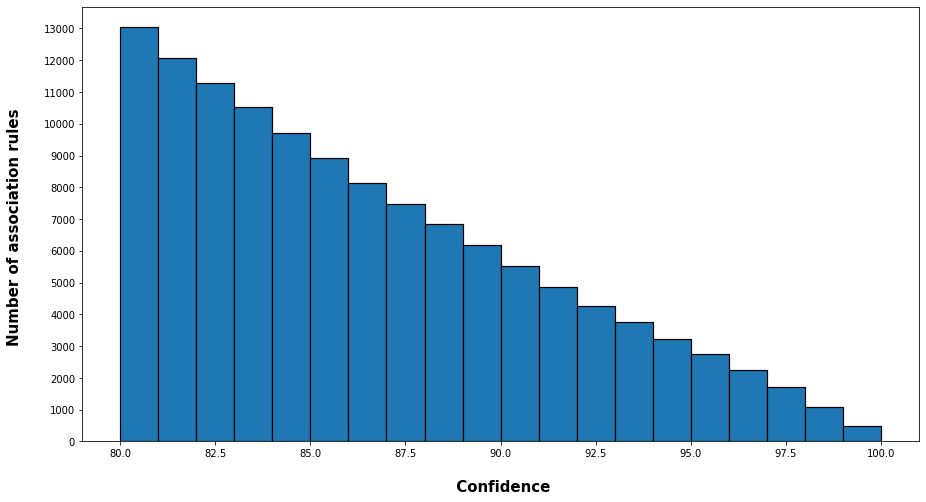

In [18]:
plt.figure(figsize=(15,8))
nar = []
conf = []
F = np.arange(80, 100, 1)
for i in F:
    nar.append(len(apriori(X, target='r', supp=2, conf = i, zmin=3, report='aScl')))
    conf.append(i)

val = np.arange(0, 14000, 1000)
plt.bar(conf, nar, align='edge', width=1, edgecolor='k', linewidth=1.2)
plt.ylabel('Number of association rules \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n Confidence', fontsize = 15, fontweight = 'bold')
plt.yticks(val)
plt.show()

In [19]:
nar[:][4]

9712

In [20]:
itemsets[0][0]

(3, 'concreteness_high', 'aoa_low')

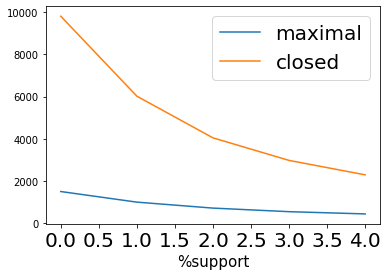

In [21]:
#Maximal & frequent itemsets
len_max_it = []
len_cl_it = []
for i in range(2, 6+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

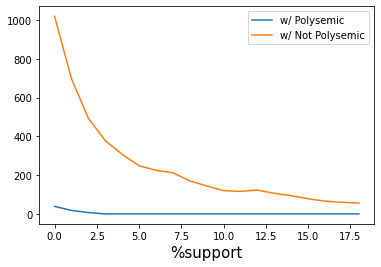

In [22]:
#Number of itemsets w/ polysemic or w/ not polysemic
filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Polysemic' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Not Polysemic' in item[0]]) )
    
plt.plot(filter_1, label='w/ Polysemic')
plt.plot(filter_2, label='w/ Not Polysemic')
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('%support', fontsize=15)

plt.show()

In [23]:
rules = apriori(X, target='r', supp=2, conf=80, zmin=3, report='aScl')

In [24]:
rules[0][0], rules[0][1]

('familiarity_high', (3, 'concreteness_high', 'aoa_low'))

In [25]:
#asbolute support
rules[0][2]

79

In [26]:
#support as percentage
rules[0][3]

1.687313114053823

In [27]:
#confidence
rules[0][4]

0.8144329896907216

In [28]:
#lift
rules[1][5]

1.745900063815228

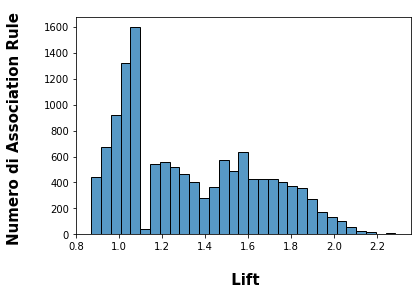

In [29]:
i = 0
a = []
while (i < len(rules)):
    if (rules[i][5]):
        a.append(rules[i][5])
    i+=1
sns.histplot(a)
plt.xlabel('\n Lift', fontsize = 15, fontweight='bold')
plt.ylabel('Number of association Rule \n', fontsize= 15, fontweight='bold')
plt.show()

In [30]:
i=0
c = []
while(i<(len(rules))):
    if (rules[i][5] > 2.2):
        c.append(rules[i])
    i +=1
    
res = pd.DataFrame(c)
res

,0,1,2,3,4,5
0,valence_low,"(gender_mal, familiarity_low, dominance_low, a...",92,1.964972,0.968421,2.286509
1,valence_low,"(gender_mal, dominance_low, arousal_high, aoa_...",93,1.986331,0.958763,2.263705
2,valence_low,"(gender_mal, dominance_low, arousal_high, aoa_...",95,2.029047,0.959596,2.265672
3,valence_low,"(gender_mal, dominance_low, arousal_high, aoa_...",103,2.199915,0.953704,2.251760
4,valence_low,"(gender_mal, dominance_low, arousal_high, aoa_...",106,2.263990,0.954955,2.254715
5,valence_low,"(gender_mal, dominance_low, arousal_high, web_...",126,2.691158,0.933333,2.203664
6,valence_low,"(gender_mal, dominance_low, arousal_high, web_...",130,2.776591,0.935252,2.208194
7,valence_low,"(gender_mal, dominance_low, aoa_high, concrete...",90,1.922255,0.957447,2.260598
8,valence_low,"(gender_mal, dominance_low, aoa_high, concrete...",92,1.964972,0.958333,2.262691
9,valence_low,"(gender_mal, dominance_low, concreteness_low, ...",107,2.285348,0.955357,2.255664


In [31]:
for i in range(len(res)):
    print(res[1][i])

('gender_mal', 'familiarity_low', 'dominance_low', 'arousal_high')
('gender_mal', 'dominance_low', 'arousal_high', 'aoa_high', 'web_corpus_no_freq', 'Not Polysemic')
('gender_mal', 'dominance_low', 'arousal_high', 'aoa_high', 'web_corpus_no_freq')
('gender_mal', 'dominance_low', 'arousal_high', 'aoa_high', 'Not Polysemic')
('gender_mal', 'dominance_low', 'arousal_high', 'aoa_high')
('gender_mal', 'dominance_low', 'arousal_high', 'web_corpus_no_freq', 'Not Polysemic')
('gender_mal', 'dominance_low', 'arousal_high', 'web_corpus_no_freq')
('gender_mal', 'dominance_low', 'aoa_high', 'concreteness_low', 'web_corpus_no_freq', 'Not Polysemic')
('gender_mal', 'dominance_low', 'aoa_high', 'concreteness_low', 'web_corpus_no_freq')
('gender_mal', 'dominance_low', 'concreteness_low', 'web_corpus_no_freq', 'Not Polysemic')
('gender_mal', 'dominance_low', 'concreteness_low', 'web_corpus_no_freq')
(6, 'concreteness_high', 'aoa_high', 'arousal_low', 'web_corpus_no_freq', 'Not Polysemic')
(6, 'concrete

In [32]:
i = 0
high = 0
while (i < len(rules)):
    if (len(rules[i][1]) == 4):
        if (rules[i][3]) > high:
            high = rules[i][3]
            a = i
    i += 1
print(rules[a][1], high)

('familiarity_low', 'aoa_high', 'web_corpus_no_freq', 'gender_unisex') 20.034173430158052


In [33]:
rules = apriori(X, target='r', supp=2, conf=80, zmin=3, report='aScl')

In [34]:
#check how many ass. rules contains 'Not polysemic'
num = 0
for r in rules:
    if (r[0] == 'Not Polysemic'): #changing this we can find how many ass. rules contains other things
        #print(r)
        num += 1
num

4961

# Prediction of a target variable

In [36]:
print('to_predict:', [r for r in rules if r[0] == 'Not Polysemic'][0][0])
print('how?', [r for r in rules if r[0] == 'Not Polysemic'][0][1])

to_predict: Not Polysemic
how? (10, 'familiarity_low', 'aoa_high')


# Relationship between 'confidence' and 'support'

In [37]:
len_r = []
for i in range(2, 20+1): #support
    len_r_wrt_i = []
    for j in range(80, 100+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) #study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

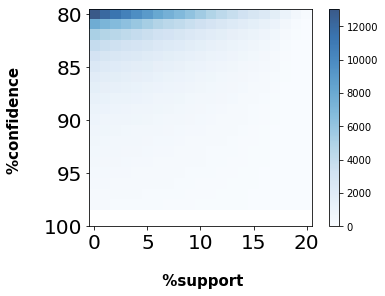

In [38]:
plt.imshow(len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('\n %support', fontsize=15, fontweight = 'bold')
plt.ylabel('%confidence \n', fontsize=15, fontweight = 'bold')
plt.xticks(fontsize=20)
plt.yticks(np.arange(0,25,5), np.arange(80,105,5), fontsize=20)
plt.colorbar()

plt.show()

# Searching if missing values (from data preparation) are in the same range here

In [39]:
mv=[585, 753, 1070, 1076, 1540, 1559, 2673, 2724, 2726, 3773, 4347, 4365, 4373, 4668]
print(df.iloc[585][9], 'position', mv[0])
print(df.iloc[753][9], 'position', mv[1])
print(df.iloc[1070][9], 'position', mv[2])
print(df.iloc[1076][9], 'position', mv[3])
print(df.iloc[1540][9], 'position', mv[4])
print(df.iloc[1559][9], 'position', mv[5])
print(df.iloc[2673][9], 'position', mv[6])
print(df.iloc[2724][9], 'position', mv[7])
print(df.iloc[2726][9], 'position', mv[8])
print(df.iloc[3773][9], 'position', mv[9])
print(df.iloc[4347][9], 'position', mv[10])
print(df.iloc[4365][9], 'position', mv[11])
print(df.iloc[4373][9], 'position', mv[12])
print(df.iloc[4668][9], 'position', mv[13])

web_corpus_no_freq position 585
web_corpus_no_freq position 753
web_corpus_no_freq position 1070
web_corpus_no_freq position 1076
web_corpus_freq position 1540
web_corpus_no_freq position 1559
web_corpus_low_freq position 2673
web_corpus_no_freq position 2724
web_corpus_no_freq position 2726
web_corpus_no_freq position 3773
web_corpus_low_freq position 4347
web_corpus_no_freq position 4365
web_corpus_freq position 4373
web_corpus_no_freq position 4668
